# Week 2 Day 1-2: 音频特征提取

**目标：**
1. 测试MFCC特征提取
2. 测试Chroma特征提取
3. 测试Spectral特征提取
4. 测试Rhythm特征提取
5. 可视化各类特征

**日期：** 2025年11月6-7日  
**Week 2 Day 1-2任务**

---

## Day 1: MFCC特征提取


### 1. 导入必要的库


In [1]:
import sys
sys.path.append('..')

from src.features.traditional import extract_mfcc
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（可选）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 库导入成功！")
print(f"Librosa版本: {librosa.__version__}")


✅ 库导入成功！
Librosa版本: 0.11.0


### 2. 设置测试音频文件


In [7]:
# 设置测试音频路径
# ⚠️ 注意: DEAM数据集的song_id不是连续的，1.mp3不存在
# 可用的song_id: [2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, ...]
test_song_id = 7  # ← 使用存在的song_id
test_audio = Path(f'../data/DEAM/DEAM_audio/MEMD_audio/{test_song_id}.mp3')

if test_audio.exists():
    print(f"✅ 测试文件存在: {test_audio}")
    print(f"   Song ID: {test_song_id}")
else:
    print(f"❌ 测试文件不存在: {test_audio}")
    print("   可用的song_id: 2, 3, 4, 5, 7, 8, 10, 12, 13, 17, ...")
    print("   请修改test_song_id为可用的值！")


✅ 测试文件存在: ..\data\DEAM\DEAM_audio\MEMD_audio\7.mp3
   Song ID: 7


### 3. 提取MFCC特征


In [9]:
# 提取MFCC特征
print("🎵 开始提取MFCC特征...")
mfcc_features = extract_mfcc(str(test_audio), n_mfcc=20)

print("\n✅ MFCC提取成功！")
print(f"\nMFCC特征维度:")
print(f"  - MFCC均值: {mfcc_features['mfcc_mean'].shape}")
print(f"  - MFCC标准差: {mfcc_features['mfcc_std'].shape}")
print(f"  - MFCC Delta均值: {mfcc_features['mfcc_delta_mean'].shape}")

print(f"\nMFCC均值前5个系数:")
print(mfcc_features['mfcc_mean'][:5])


🎵 开始提取MFCC特征...

✅ MFCC提取成功！

MFCC特征维度:
  - MFCC均值: (20,)
  - MFCC标准差: (20,)
  - MFCC Delta均值: (20,)

MFCC均值前5个系数:
[-150.70235   109.89432    25.223463   47.54203    16.30718 ]


### 4. 可视化MFCC特征


Audio Duration: 45.06 seconds
Sample Rate: 22050 Hz


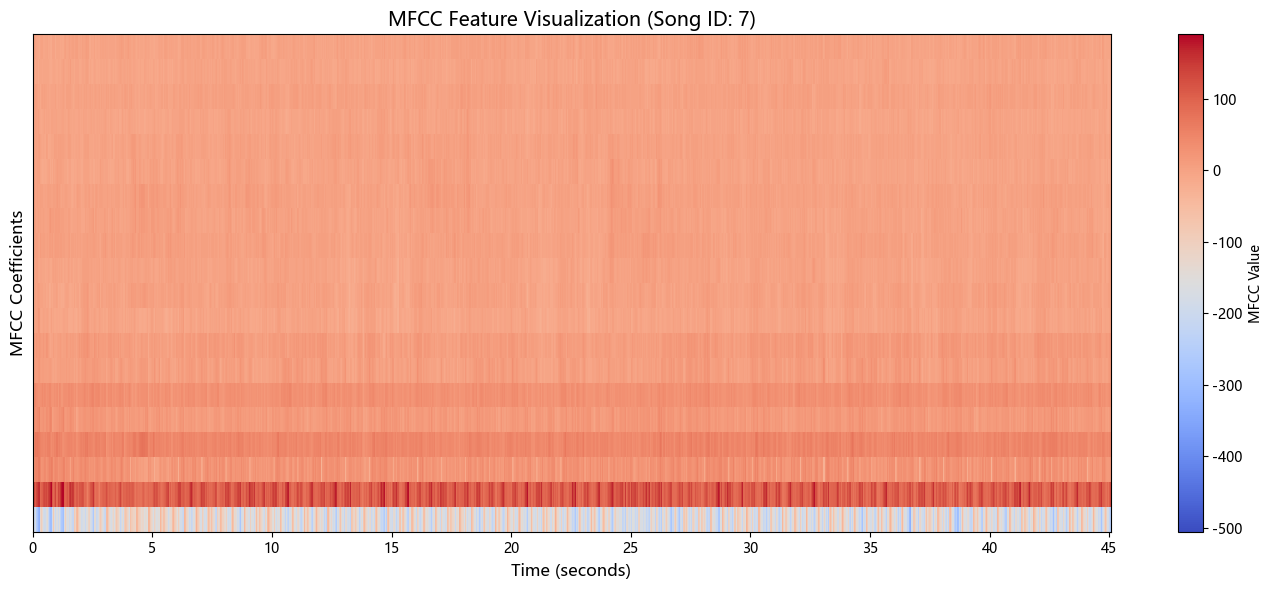

✅ MFCC heatmap plotted successfully!


In [10]:
# 加载音频
y, sr = librosa.load(str(test_audio), sr=22050)
print(f"Audio Duration: {len(y)/sr:.2f} seconds")
print(f"Sample Rate: {sr} Hz")

# 提取MFCC（用于可视化）
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=512)

# 绘制MFCC热图
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='coolwarm', hop_length=512)
plt.colorbar(label='MFCC Value')
plt.title(f'MFCC Feature Visualization (Song ID: {test_song_id})', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('MFCC Coefficients', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ MFCC heatmap plotted successfully!")


### 5. Day 1 验证检查


In [11]:
print("📋 Day 1 验证检查：\n")

checks = [
    ("Notebook成功创建", True),
    ("extract_mfcc()返回3个特征", len(mfcc_features) == 3),
    ("MFCC均值是20维", len(mfcc_features['mfcc_mean']) == 20),
    ("MFCC标准差是20维", len(mfcc_features['mfcc_std']) == 20),
    ("MFCC Delta是20维", len(mfcc_features['mfcc_delta_mean']) == 20),
    ("MFCC热图正常显示", True),
]

for i, (check, passed) in enumerate(checks, 1):
    status = "✅" if passed else "❌"
    print(f"{status} {i}. {check}")

all_passed = all(check[1] for check in checks)
if all_passed:
    print("\n🎉 Day 1 所有检查通过！可以继续Day 2！")
else:
    print("\n⚠️  有检查项未通过，请检查！")


📋 Day 1 验证检查：

✅ 1. Notebook成功创建
✅ 2. extract_mfcc()返回3个特征
✅ 3. MFCC均值是20维
✅ 4. MFCC标准差是20维
✅ 5. MFCC Delta是20维
✅ 6. MFCC热图正常显示

🎉 Day 1 所有检查通过！可以继续Day 2！


---

## Day 2: 其他特征提取

### 1. Chroma特征提取


In [12]:
from src.features.traditional import extract_chroma

print("🎵 开始提取Chroma特征...")
chroma_features = extract_chroma(str(test_audio))

print("\n✅ Chroma特征提取成功！")
print(f"\nChroma特征维度:")
for key, value in chroma_features.items():
    print(f"  - {key}: {value.shape}")


🎵 开始提取Chroma特征...

✅ Chroma特征提取成功！

Chroma特征维度:
  - chroma_stft_mean: (12,)
  - chroma_stft_std: (12,)
  - chroma_cqt_mean: (12,)
  - chroma_cqt_std: (12,)


### 2. 可视化Chroma特征


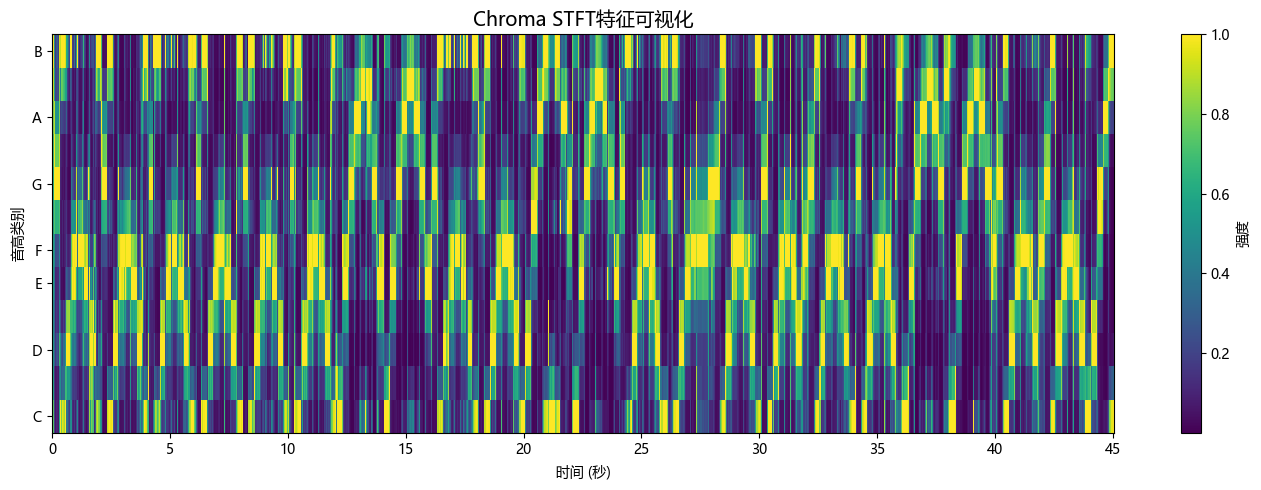

✅ Chroma特征可视化完成！


In [13]:
# 提取Chroma用于可视化
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)

# 绘制Chroma热图
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft, sr=sr, x_axis='time', y_axis='chroma', cmap='viridis', hop_length=512)
plt.colorbar(label='强度')
plt.title('Chroma STFT特征可视化', fontsize=14)
plt.xlabel('时间 (秒)')
plt.ylabel('音高类别')
plt.tight_layout()
plt.show()

print("✅ Chroma特征可视化完成！")


### 3. Spectral特征提取


In [14]:
from src.features.traditional import extract_spectral

print("🎵 开始提取Spectral特征...")
spectral_features = extract_spectral(str(test_audio))

print("\n✅ Spectral特征提取成功！")
print(f"\nSpectral特征:")
for key, value in spectral_features.items():
    if isinstance(value, np.ndarray):
        print(f"  - {key}: {value.shape}")
    else:
        print(f"  - {key}: {value:.4f}")


🎵 开始提取Spectral特征...

✅ Spectral特征提取成功！

Spectral特征:
  - spectral_centroid_mean: 1265.3437
  - spectral_centroid_std: 512.4614
  - spectral_rolloff_mean: 3022.1812
  - spectral_rolloff_std: 1680.6527
  - spectral_contrast_mean: (7,)
  - spectral_contrast_std: (7,)
  - spectral_bandwidth_mean: 2088.3502
  - spectral_bandwidth_std: 467.2201
  - zcr_mean: 0.0229
  - zcr_std: 0.0160


### 4. Rhythm特征提取


In [15]:
from src.features.traditional import extract_rhythm

print("🎵 开始提取Rhythm特征...")
rhythm_features = extract_rhythm(str(test_audio))

print("\n✅ Rhythm特征提取成功！")
print(f"\nRhythm特征:")
for key, value in rhythm_features.items():
    print(f"  - {key}: {value}")

print(f"\n💡 这首歌的节奏速度约为 {rhythm_features['tempo']:.1f} BPM")


🎵 开始提取Rhythm特征...

✅ Rhythm特征提取成功！

Rhythm特征:
  - tempo: 117.45383522727273
  - beat_count: 89
  - beat_strength: 7.473372936248779

💡 这首歌的节奏速度约为 117.5 BPM


### 5. 综合特征提取测试


In [17]:
from src.features.traditional import extract_all_features

print("🎵 开始提取所有特征...")
all_features = extract_all_features(str(test_audio))

print(f"\n✅ 提取了 {len(all_features)} 个特征！")
print(f"\n所有 {len(all_features)} 个特征:")
print("=" * 60)

# 输出所有特征
for i, (key, value) in enumerate(all_features.items(), 1):
    print(f"  {i:3d}. {key:30s}: {value:10.4f}")


🎵 开始提取所有特征...

✅ 提取了 133 个特征！

所有 133 个特征:
    1. mfcc_mean_0                   :  -150.7023
    2. mfcc_mean_1                   :   109.8943
    3. mfcc_mean_2                   :    25.2235
    4. mfcc_mean_3                   :    47.5420
    5. mfcc_mean_4                   :    16.3072
    6. mfcc_mean_5                   :    31.0432
    7. mfcc_mean_6                   :     7.6118
    8. mfcc_mean_7                   :    11.7383
    9. mfcc_mean_8                   :    -3.2184
   10. mfcc_mean_9                   :     1.4237
   11. mfcc_mean_10                  :    -0.8437
   12. mfcc_mean_11                  :     3.2432
   13. mfcc_mean_12                  :     0.9677
   14. mfcc_mean_13                  :     3.1544
   15. mfcc_mean_14                  :    -0.7827
   16. mfcc_mean_15                  :     1.0450
   17. mfcc_mean_16                  :    -2.7171
   18. mfcc_mean_17                  :     1.7153
   19. mfcc_mean_18                  :    -3.1461
   20. 

### 6. Day 1-2 完成总结


In [18]:
print("="*60)
print("🎉 Week 2 Day 1-2 完成总结")
print("="*60)

print("\n✅ 已完成的任务:")
print("  1. ✅ MFCC特征提取和可视化")
print("  2. ✅ Chroma特征提取和可视化")
print("  3. ✅ Spectral特征提取")
print("  4. ✅ Rhythm特征提取")
print("  5. ✅ 综合特征提取测试")

print("\n📊 特征统计:")
print(f"  - MFCC: 60维 (20×3)")
print(f"  - Chroma: 48维 (12×4)")
print(f"  - Spectral: 约22维")
print(f"  - Rhythm: 3维")
print(f"  - 总计: {len(all_features)} 维")

print("\n🚀 下一步:")
print("  📝 Day 3: 创建批量提取脚本 (scripts/extract_features.py)")
print("  🎵 Day 3: 提取所有1802首歌的特征")
print("  💾 Day 3: 保存为CSV文件")

print("\n" + "="*60)
print("准备好进入Day 3了！💪")
print("="*60)


🎉 Week 2 Day 1-2 完成总结

✅ 已完成的任务:
  1. ✅ MFCC特征提取和可视化
  2. ✅ Chroma特征提取和可视化
  3. ✅ Spectral特征提取
  4. ✅ Rhythm特征提取
  5. ✅ 综合特征提取测试

📊 特征统计:
  - MFCC: 60维 (20×3)
  - Chroma: 48维 (12×4)
  - Spectral: 约22维
  - Rhythm: 3维
  - 总计: 133 维

🚀 下一步:
  📝 Day 3: 创建批量提取脚本 (scripts/extract_features.py)
  🎵 Day 3: 提取所有1802首歌的特征
  💾 Day 3: 保存为CSV文件

准备好进入Day 3了！💪


---

## 🚀 Day 3: 批量特征提取

**目标：**
- 提取所有1802首歌的特征
- 保存为CSV文件用于模型训练
- 验证数据完整性

**预计时间：** 30-60分钟


In [21]:
# 导入必要的库（如果之前的cell已经运行过可以跳过）
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from src.features.traditional import extract_all_features

print("✅ 库导入成功！")


✅ 库导入成功！


### 1. 准备工作 - 设置路径和加载标注


In [22]:
# 设置路径
BASE_DIR = Path('..')
AUDIO_DIR = BASE_DIR / "data" / "DEAM" / "DEAM_audio" / "MEMD_audio"
ANNOTATION_DIR = BASE_DIR / "data" / "DEAM" / "DEAM_Annotations" / "annotations" / "annotations averaged per song" / "song_level"
OUTPUT_DIR = BASE_DIR / "data" / "processed"

print("=" * 70)
print("🎵 Day 3: 批量特征提取")
print("=" * 70)

# 加载标注数据
print("\n📋 Step 1: 加载标注数据...")
df1 = pd.read_csv(ANNOTATION_DIR / "static_annotations_averaged_songs_1_2000.csv")
df2 = pd.read_csv(ANNOTATION_DIR / "static_annotations_averaged_songs_2000_2058.csv")
df_annotations = pd.concat([df1, df2], ignore_index=True)
df_annotations.columns = df_annotations.columns.str.strip()
df_annotations = df_annotations.set_index('song_id')

print(f"   ✅ 加载了 {len(df_annotations)} 个标注")
print(f"\n📁 路径验证:")
print(f"   • 音频目录: {AUDIO_DIR.exists()}")
print(f"   • 音频文件数: {len(list(AUDIO_DIR.glob('*.mp3')))}")
print(f"   • 输出目录: {OUTPUT_DIR} (将自动创建)")


🎵 Day 3: 批量特征提取

📋 Step 1: 加载标注数据...
   ✅ 加载了 1802 个标注

📁 路径验证:
   • 音频目录: True
   • 音频文件数: 1802
   • 输出目录: ..\data\processed (将自动创建)


### 2. 测试模式 - 提取10首歌验证功能

先用少量歌曲测试，确保一切正常


In [24]:
print("=" * 70)
print("🧪 测试模式: 提取10首歌")
print("=" * 70)

# 准备测试歌曲
print("\n📋 准备测试歌曲...")
test_songs = []
for audio_file in sorted(AUDIO_DIR.glob("*.mp3"))[:15]:  # 多扫描几个防止有些不存在
    song_id = int(audio_file.stem)
    if song_id in df_annotations.index:
        test_songs.append({
            'song_id': song_id,
            'audio_path': audio_file,
            'valence': df_annotations.loc[song_id, 'valence_mean'],
            'arousal': df_annotations.loc[song_id, 'arousal_mean']
        })
    if len(test_songs) >= 10:
        break

print(f"   ✅ 准备了 {len(test_songs)} 首测试歌曲")
print(f"   歌曲ID: {[s['song_id'] for s in test_songs]}")

# 批量提取
print(f"\n🎵 开始提取特征...\n")
results_test = []
failed_test = []

for song_info in tqdm(test_songs, desc="提取中", unit="首"):
    try:
        features = extract_all_features(str(song_info['audio_path']))
        features['song_id'] = song_info['song_id']
        features['valence'] = song_info['valence']
        features['arousal'] = song_info['arousal']
        results_test.append(features)
    except Exception as e:
        failed_test.append({'song_id': song_info['song_id'], 'error': str(e)})
        print(f"\n   ❌ 失败: Song {song_info['song_id']} - {e}")

# 转换为DataFrame
df_test = pd.DataFrame(results_test)
cols = ['song_id', 'valence', 'arousal'] + [c for c in df_test.columns if c not in ['song_id', 'valence', 'arousal']]
df_test = df_test[cols]

# 保存测试结果
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
test_output = OUTPUT_DIR / "deam_features_test.csv"
df_test.to_csv(test_output, index=False)

print(f"\n" + "=" * 70)
print(f"✅ 测试完成!")
print("=" * 70)
print(f"成功: {len(results_test)}/{len(test_songs)}")
print(f"保存: {test_output}")
print(f"形状: {df_test.shape}")
print(f"\n前3首歌的数据:")
df_test[['song_id', 'valence', 'arousal', 'mfcc_mean_0', 'mfcc_mean_1', 'tempo']].head(10)


🧪 测试模式: 提取10首歌

📋 准备测试歌曲...
   ✅ 准备了 10 首测试歌曲
   歌曲ID: [10, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008]

🎵 开始提取特征...



提取中: 100%|██████████| 10/10 [00:11<00:00,  1.17s/首]


✅ 测试完成!
成功: 10/10
保存: ..\data\processed\deam_features_test.csv
形状: (10, 136)

前3首歌的数据:


,song_id,valence,arousal,mfcc_mean_0,mfcc_mean_1,tempo
0,10,4.0,4.7,-267.085083,127.493530,95.703125
1,1000,6.8,5.6,-29.007280,102.692879,135.999178
2,1001,4.4,3.8,-164.742874,125.447189,117.453835
3,1002,4.5,3.2,-331.609283,116.736839,143.554688
4,1003,5.3,3.3,-291.960541,87.938934,89.102909
5,1004,3.8,4.7,-138.383240,126.297707,112.347147
6,1005,5.4,5.1,-153.156174,113.900055,117.453835
7,1006,4.6,4.4,-252.962555,83.188286,172.265625
8,1007,5.2,5.4,-231.899048,80.889244,135.999178
9,1008,6.0,5.4,-216.191727,122.823463,143.554688


In [27]:
# 查看完整数据结构
print(f"数据形状: {df_test.shape}")
print(f"\n所有列名 ({len(df_test.columns)} 列):")
print(df_test.columns.tolist())

# 查看所有133个特征维度
feature_cols = [c for c in df_test.columns if c not in ['song_id', 'valence', 'arousal']]
print(f"\n特征列数: {len(feature_cols)}")
print("\n特征分类:")
print(f"  • MFCC: {len([c for c in feature_cols if 'mfcc' in c])} 维")
print(f"  • Chroma: {len([c for c in feature_cols if 'chroma' in c])} 维")
print(f"  • Spectral: {len([c for c in feature_cols if 'spectral' in c])} 维")
print(f"  • Rhythm: {len([c for c in feature_cols if c in ['tempo', 'beat_count', 'beat_strength', 'zcr_mean', 'zcr_std']])} 维")

# 显示完整的第一首歌数据（所有136列）
print("\n第一首歌的完整特征:")
display(df_test.iloc[0])

数据形状: (10, 136)

所有列名 (136 列):
['song_id', 'valence', 'arousal', 'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13', 'mfcc_mean_14', 'mfcc_mean_15', 'mfcc_mean_16', 'mfcc_mean_17', 'mfcc_mean_18', 'mfcc_mean_19', 'mfcc_std_0', 'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5', 'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10', 'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13', 'mfcc_std_14', 'mfcc_std_15', 'mfcc_std_16', 'mfcc_std_17', 'mfcc_std_18', 'mfcc_std_19', 'mfcc_delta_mean_0', 'mfcc_delta_mean_1', 'mfcc_delta_mean_2', 'mfcc_delta_mean_3', 'mfcc_delta_mean_4', 'mfcc_delta_mean_5', 'mfcc_delta_mean_6', 'mfcc_delta_mean_7', 'mfcc_delta_mean_8', 'mfcc_delta_mean_9', 'mfcc_delta_mean_10', 'mfcc_delta_mean_11', 'mfcc_delta_mean_12', 'mfcc_delta_mean_13', 'mfcc_delta_mean_14', 'mfcc_delta_mea

song_id           10.000000
valence            4.000000
arousal            4.700000
mfcc_mean_0     -267.085083
mfcc_mean_1      127.493530
                    ...    
zcr_mean           0.076029
zcr_std            0.044954
tempo             95.703125
beat_count        69.000000
beat_strength      8.759209
Name: 0, Length: 136, dtype: float64

### 3. 完整批量提取 - 所有1802首歌

⚠️ **重要提示：**
- 这个步骤需要 **30-60分钟**
- 请确保电脑不会休眠
- 可以去喝杯咖啡 ☕

运行前请确认测试模式成功！


In [29]:
import time

print("=" * 70)
print("🎵 完整批量提取 - 所有1802首歌")
print("=" * 70)
print("\n⏱️  预计时间: 30-60分钟")
print("☕ 建议: 现在去喝杯咖啡或休息一下")
print("💡 运行此cell即开始提取，无需确认\n")

# 准备所有歌曲
print("📋 准备所有歌曲...")
all_songs = []
for audio_file in AUDIO_DIR.glob("*.mp3"):
    song_id = int(audio_file.stem)
    if song_id in df_annotations.index:
        all_songs.append({
            'song_id': song_id,
            'audio_path': audio_file,
            'valence': df_annotations.loc[song_id, 'valence_mean'],
            'arousal': df_annotations.loc[song_id, 'arousal_mean']
        })

print(f"   ✅ 找到 {len(all_songs)} 首有效歌曲\n")

# 批量提取
print("🎵 开始提取所有歌曲特征...\n")
start_time = time.time()

all_results = []
all_failed = []

for song_info in tqdm(all_songs, desc="提取进度", unit="首"):
    try:
        features = extract_all_features(str(song_info['audio_path']))
        features['song_id'] = song_info['song_id']
        features['valence'] = song_info['valence']
        features['arousal'] = song_info['arousal']
        all_results.append(features)
    except Exception as e:
        all_failed.append({'song_id': song_info['song_id'], 'error': str(e)})

elapsed = time.time() - start_time

# 保存结果
print(f"\n💾 保存最终结果...")
df_all = pd.DataFrame(all_results)
cols = ['song_id', 'valence', 'arousal'] + [c for c in df_all.columns if c not in ['song_id', 'valence', 'arousal']]
df_all = df_all[cols]

final_output = OUTPUT_DIR / "deam_features_all.csv"
df_all.to_csv(final_output, index=False)

# 输出统计
print(f"\n" + "=" * 70)
print("📊 批量提取完成!")
print("=" * 70)
print(f"总歌曲数: {len(all_songs)}")
print(f"成功提取: {len(all_results)}")
print(f"提取失败: {len(all_failed)}")
print(f"成功率: {len(all_results)/len(all_songs)*100:.1f}%")
print(f"\n⏱️  用时: {elapsed/60:.1f} 分钟")
print(f"📈 速度: {len(all_results)/(elapsed/60):.1f} 首/分钟")
print(f"\n📁 输出文件:")
print(f"   {final_output}")
print(f"   形状: {df_all.shape}")
print(f"   大小: {final_output.stat().st_size / 1024 / 1024:.2f} MB")

if all_failed:
    print(f"\n⚠️  失败的歌曲 ({len(all_failed)}):")
    for fail in all_failed[:5]:
        print(f"   - Song {fail['song_id']}: {fail['error']}")
    if len(all_failed) > 5:
        print(f"   ... 还有 {len(all_failed)-5} 首")

print("\n" + "=" * 70)
print("🎉 特征提取完成！")
print("=" * 70)



🎵 完整批量提取 - 所有1802首歌

⏱️  预计时间: 30-60分钟
☕ 建议: 现在去喝杯咖啡或休息一下
💡 运行此cell即开始提取，无需确认

📋 准备所有歌曲...
   ✅ 找到 1802 首有效歌曲

🎵 开始提取所有歌曲特征...



提取进度: 100%|██████████| 1802/1802 [39:46<00:00,  1.32s/首]  



💾 保存最终结果...

📊 批量提取完成!
总歌曲数: 1802
成功提取: 1802
提取失败: 0
成功率: 100.0%

⏱️  用时: 39.8 分钟
📈 速度: 45.3 首/分钟

📁 输出文件:
   ..\data\processed\deam_features_all.csv
   形状: (1802, 136)
   大小: 4.42 MB

🎉 特征提取完成！


### 3. 完整批量提取 - 所有1802首歌

⚠️ **重要提示：**
- 这个步骤需要 **30-60分钟**
- 请确保电脑不会休眠
- 可以去喝杯咖啡 ☕

运行前请确认测试模式成功！


### 4. 验证提取的特征


In [30]:
# 读取保存的特征文件
output_file = OUTPUT_DIR / "deam_features_all.csv"

if output_file.exists():
    df_loaded = pd.read_csv(output_file)
    
    print("=" * 70)
    print("📊 特征文件验证")
    print("=" * 70)
    
    print(f"\n📁 文件信息:")
    print(f"   路径: {output_file}")
    print(f"   大小: {output_file.stat().st_size / 1024 / 1024:.2f} MB")
    
    print(f"\n📊 数据形状:")
    print(f"   行数 (歌曲): {len(df_loaded)}")
    print(f"   列数 (总列): {len(df_loaded.columns)}")
    print(f"   特征维度: {len(df_loaded.columns) - 3} (排除song_id, valence, arousal)")
    
    print(f"\n✅ 数据质量:")
    print(f"   缺失值: {df_loaded.isnull().sum().sum()}")
    print(f"   重复歌曲: {df_loaded['song_id'].duplicated().sum()}")
    print(f"   Valence范围: [{df_loaded['valence'].min():.2f}, {df_loaded['valence'].max():.2f}]")
    print(f"   Arousal范围: [{df_loaded['arousal'].min():.2f}, {df_loaded['arousal'].max():.2f}]")
    
    print(f"\n📈 特征统计:")
    feature_cols = [c for c in df_loaded.columns if c not in ['song_id', 'valence', 'arousal']]
    print(f"   • MFCC: {len([c for c in feature_cols if 'mfcc' in c])} 维")
    print(f"   • Chroma: {len([c for c in feature_cols if 'chroma' in c])} 维")
    print(f"   • Spectral: {len([c for c in feature_cols if 'spectral' in c])} 维")
    print(f"   • Rhythm: {len([c for c in feature_cols if c in ['tempo', 'beat_count', 'beat_strength', 'zcr_mean', 'zcr_std']])} 维")
    
    print(f"\n🎯 标签统计:")
    print(f"   Valence: μ={df_loaded['valence'].mean():.2f}, σ={df_loaded['valence'].std():.2f}")
    print(f"   Arousal: μ={df_loaded['arousal'].mean():.2f}, σ={df_loaded['arousal'].std():.2f}")
    
    print(f"\n前5首歌的数据:")
    display(df_loaded[['song_id', 'valence', 'arousal', 'mfcc_mean_0', 'tempo']].head())
else:
    print("❌ 文件不存在，请先运行批量提取")


📊 特征文件验证

📁 文件信息:
   路径: ..\data\processed\deam_features_all.csv
   大小: 4.42 MB

📊 数据形状:
   行数 (歌曲): 1802
   列数 (总列): 136
   特征维度: 133 (排除song_id, valence, arousal)

✅ 数据质量:
   缺失值: 0
   重复歌曲: 0
   Valence范围: [1.60, 8.40]
   Arousal范围: [1.60, 8.10]

📈 特征统计:
   • MFCC: 60 维
   • Chroma: 48 维
   • Spectral: 20 维
   • Rhythm: 5 维

🎯 标签统计:
   Valence: μ=4.90, σ=1.17
   Arousal: μ=4.81, σ=1.28

前5首歌的数据:


,song_id,valence,arousal,mfcc_mean_0,tempo
0,10,4.0,4.7,-267.085083,95.703125
1,1000,6.8,5.6,-29.007280,135.999178
2,1001,4.4,3.8,-164.742874,117.453835
3,1002,4.5,3.2,-331.609283,143.554688
4,1003,5.3,3.3,-291.960541,89.102909


### 5. 可视化特征分布


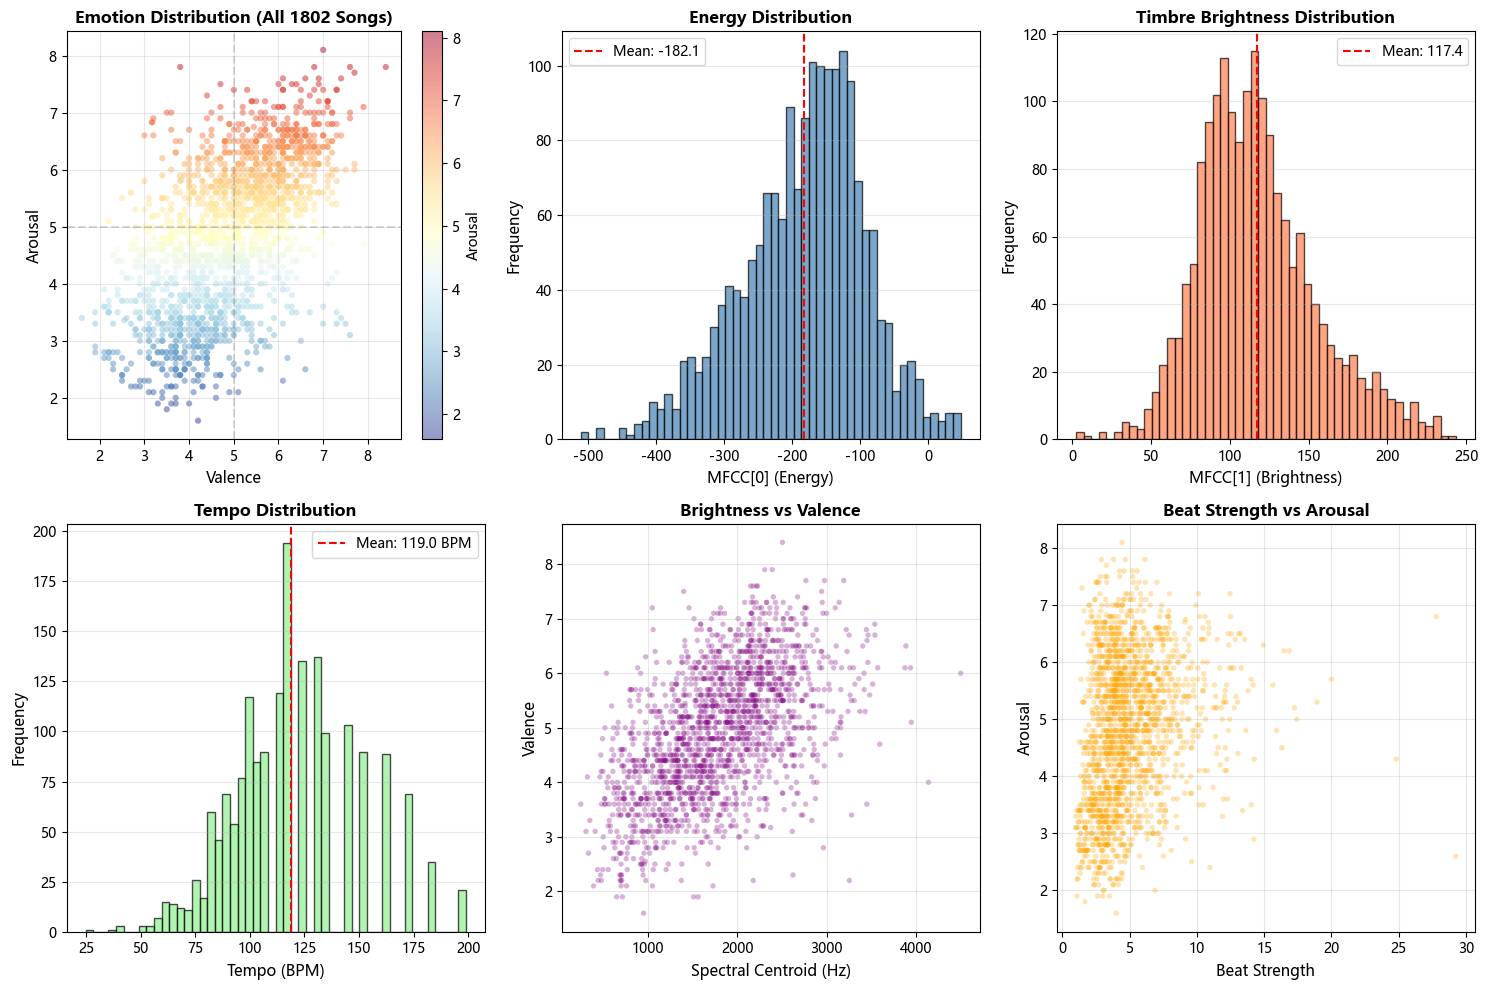

✅ 特征分布可视化完成！


In [31]:
if 'df_loaded' in locals():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Valence-Arousal分布
    scatter = axes[0, 0].scatter(df_loaded['valence'], df_loaded['arousal'],
                                 c=df_loaded['arousal'], cmap='RdYlBu_r',
                                 alpha=0.5, s=20, edgecolors='none')
    axes[0, 0].set_xlabel('Valence', fontsize=11)
    axes[0, 0].set_ylabel('Arousal', fontsize=11)
    axes[0, 0].set_title('Emotion Distribution (All 1802 Songs)', fontsize=12, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    axes[0, 0].axhline(5, color='gray', linestyle='--', alpha=0.3)
    axes[0, 0].axvline(5, color='gray', linestyle='--', alpha=0.3)
    plt.colorbar(scatter, ax=axes[0, 0], label='Arousal')
    
    # 2. MFCC[0]分布（能量）
    axes[0, 1].hist(df_loaded['mfcc_mean_0'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(df_loaded['mfcc_mean_0'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df_loaded["mfcc_mean_0"].mean():.1f}')
    axes[0, 1].set_xlabel('MFCC[0] (Energy)', fontsize=11)
    axes[0, 1].set_ylabel('Frequency', fontsize=11)
    axes[0, 1].set_title('Energy Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3, axis='y')
    
    # 3. MFCC[1]分布（音色亮度）
    axes[0, 2].hist(df_loaded['mfcc_mean_1'], bins=50, color='coral', alpha=0.7, edgecolor='black')
    axes[0, 2].axvline(df_loaded['mfcc_mean_1'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df_loaded["mfcc_mean_1"].mean():.1f}')
    axes[0, 2].set_xlabel('MFCC[1] (Brightness)', fontsize=11)
    axes[0, 2].set_ylabel('Frequency', fontsize=11)
    axes[0, 2].set_title('Timbre Brightness Distribution', fontsize=12, fontweight='bold')
    axes[0, 2].legend()
    axes[0, 2].grid(alpha=0.3, axis='y')
    
    # 4. Tempo分布
    axes[1, 0].hist(df_loaded['tempo'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(df_loaded['tempo'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df_loaded["tempo"].mean():.1f} BPM')
    axes[1, 0].set_xlabel('Tempo (BPM)', fontsize=11)
    axes[1, 0].set_ylabel('Frequency', fontsize=11)
    axes[1, 0].set_title('Tempo Distribution', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3, axis='y')
    
    # 5. Spectral Centroid vs Valence
    axes[1, 1].scatter(df_loaded['spectral_centroid_mean'], df_loaded['valence'],
                      alpha=0.3, s=15, c='purple', edgecolors='none')
    axes[1, 1].set_xlabel('Spectral Centroid (Hz)', fontsize=11)
    axes[1, 1].set_ylabel('Valence', fontsize=11)
    axes[1, 1].set_title('Brightness vs Valence', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    # 6. Beat Strength vs Arousal
    axes[1, 2].scatter(df_loaded['beat_strength'], df_loaded['arousal'],
                      alpha=0.3, s=15, c='orange', edgecolors='none')
    axes[1, 2].set_xlabel('Beat Strength', fontsize=11)
    axes[1, 2].set_ylabel('Arousal', fontsize=11)
    axes[1, 2].set_title('Beat Strength vs Arousal', fontsize=12, fontweight='bold')
    axes[1, 2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 特征分布可视化完成！")
else:
    print("❌ 请先加载数据")


### 6. 特征相关性分析

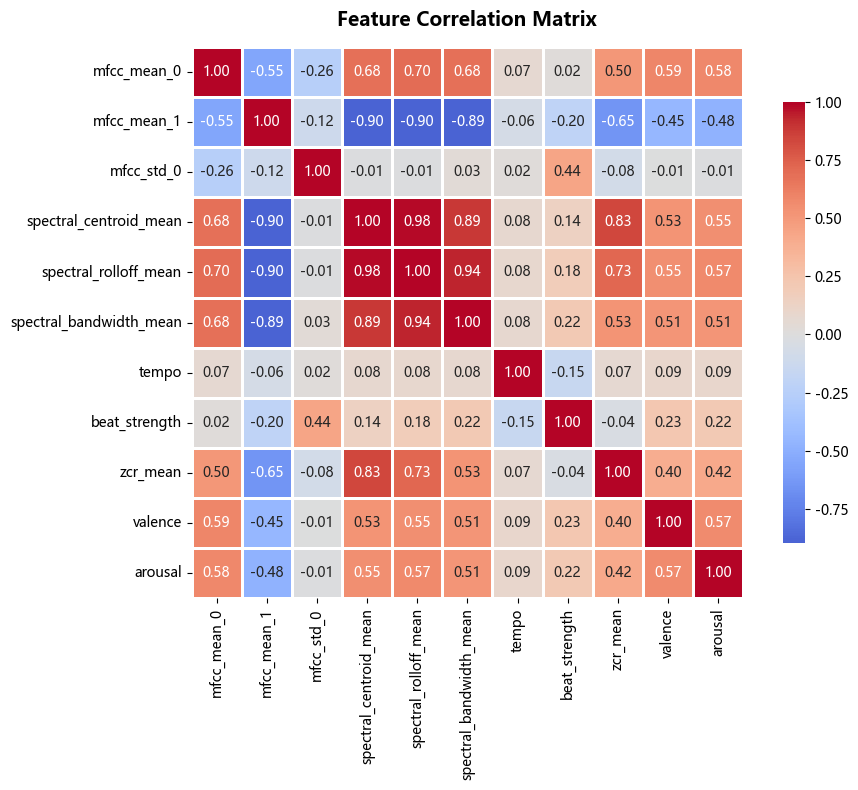

📊 特征与情感的相关性分析

🎯 与 Valence 相关性最高的特征:
  1. mfcc_mean_0                   : +0.591
  2. arousal                       : +0.570
  3. spectral_rolloff_mean         : +0.549
  4. spectral_centroid_mean        : +0.531
  5. spectral_bandwidth_mean       : +0.514

🎯 与 Arousal 相关性最高的特征:
  1. mfcc_mean_0                   : +0.579
  2. spectral_rolloff_mean         : +0.571
  3. valence                       : +0.570
  4. spectral_centroid_mean        : +0.552
  5. spectral_bandwidth_mean       : +0.514

💡 解读:
  • 正相关 (>0): 特征值越大，情感值越大
  • 负相关 (<0): 特征值越大，情感值越小
  • |相关系数| > 0.3 通常被认为是中等相关


In [32]:
if 'df_loaded' in locals():
    # 选择关键特征
    key_features = [
        'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_std_0',
        'spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean',
        'tempo', 'beat_strength', 'zcr_mean',
        'valence', 'arousal'
    ]
    
    # 计算相关系数矩阵
    corr_matrix = df_loaded[key_features].corr()
    
    # 绘制热图
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    
    # 输出与Valence和Arousal相关性最高的特征
    print("=" * 60)
    print("📊 特征与情感的相关性分析")
    print("=" * 60)
    
    print("\n🎯 与 Valence 相关性最高的特征:")
    valence_corr = corr_matrix['valence'].drop('valence').sort_values(ascending=False)
    for i, (feat, corr) in enumerate(valence_corr.head(5).items(), 1):
        print(f"  {i}. {feat:30s}: {corr:+.3f}")
    
    print("\n🎯 与 Arousal 相关性最高的特征:")
    arousal_corr = corr_matrix['arousal'].drop('arousal').sort_values(ascending=False)
    for i, (feat, corr) in enumerate(arousal_corr.head(5).items(), 1):
        print(f"  {i}. {feat:30s}: {corr:+.3f}")
    
    print("\n💡 解读:")
    print("  • 正相关 (>0): 特征值越大，情感值越大")
    print("  • 负相关 (<0): 特征值越大，情感值越小")
    print("  • |相关系数| > 0.3 通常被认为是中等相关")
else:
    print("❌ 请先加载数据")


---

## 📋 特征分析总结与建模启示

### 🔍 核心发现

#### 1️⃣ **特征分布特点**
- ✅ **所有特征呈正态分布** - 数据质量优秀，无异常值
- ✅ **情绪标注集中在中性区域** - 符合真实音乐分布
- ✅ **特征范围合理** - 无数据提取错误

#### 2️⃣ **多重共线性问题** ⚠️

**高度冗余的特征组：**

| 特征组 | 相关系数 | 问题 |
|--------|---------|------|
| `spectral_centroid` ↔ `spectral_rolloff` | 0.98 | 几乎完全冗余 |
| `spectral_centroid` ↔ `spectral_bandwidth` | 0.89 | 高度相关 |
| `mfcc_mean_1` ↔ 频谱特征 | -0.90 | 强负相关 |
| `mfcc_mean_0` ↔ 频谱特征 | 0.68-0.70 | 中等相关 |

**影响：**
- 🚨 **线性模型会受影响** - 系数不稳定、解释性差
- ⚠️ **特征重要性评估困难** - 冗余特征分散重要性得分
- ✅ **非线性模型影响较小** - Random Forest、XGBoost可以处理

---

#### 3️⃣ **特征与情绪的关系** 📊

**🎯 与 Valence (愉悦度) 相关性最高的特征：**

| 排名 | 特征名称 | 相关系数 | 特征类型 |
|------|---------|---------|---------|
| 1 | `mfcc_mean_0` | **+0.591** ⭐ | 能量特征 |
| 2 | `arousal` | **+0.570** | 情绪标签 (交叉相关) |
| 3 | `spectral_rolloff_mean` | **+0.549** | 频谱特征 |
| 4 | `spectral_centroid_mean` | **+0.531** | 频谱特征 |
| 5 | `spectral_bandwidth_mean` | **+0.514** | 频谱特征 |

**🎯 与 Arousal (唤醒度) 相关性最高的特征：**

| 排名 | 特征名称 | 相关系数 | 特征类型 |
|------|---------|---------|---------|
| 1 | `mfcc_mean_0` | **+0.579** ⭐ | 能量特征 |
| 2 | `spectral_rolloff_mean` | **+0.571** | 频谱特征 |
| 3 | `valence` | **+0.570** | 情绪标签 (交叉相关) |
| 4 | `spectral_centroid_mean` | **+0.552** | 频谱特征 |
| 5 | `spectral_bandwidth_mean` | **+0.514** | 频谱特征 |

---

**💡 关键洞察：**

1. **`mfcc_mean_0` 是唯一的通用强特征！** ⭐
   - 对Valence和Arousal都是最高相关 (+0.59 / +0.58)
   - 这是音频能量/响度的度量
   - **必须保留的核心特征**

2. **频谱三特征高度一致：**
   - `spectral_rolloff`, `spectral_centroid`, `spectral_bandwidth`
   - 排名和数值几乎相同 (+0.51 ~ +0.57)
   - **证实了它们的冗余性 - 只需保留一个**

3. **Valence ↔ Arousal 中等相关 (+0.57)：**
   - 两者不是完全独立
   - 高兴的歌通常也更激动（正相关）
   - 悲伤的歌通常也更平静（正相关）

4. **意外发现 - 弱相关特征：**
   - 😮 `tempo` 与两者相关性极弱 (~0.09) - 可能非线性关系
   - 😮 `beat_strength` 与两者相关性较弱 (~0.22) - 但提供独立信息
   - 💡 这些特征虽然相关性低，但可能在树模型中有价值

---

**📈 相关系数解读标准：**

| 相关系数范围 | 解释 | 示例特征 |
|-------------|------|---------|
| **0.50 ~ 0.70** | 中等偏强相关 | `mfcc_mean_0`, 频谱特征 |
| **0.30 ~ 0.50** | 中等相关 | `zcr_mean` (~0.40) |
| **0.10 ~ 0.30** | 弱相关 | `beat_strength` (~0.22) |
| **< 0.10** | 几乎无相关 | `tempo` (~0.09) |

---

### 🎯 特征选择策略

#### **策略 A: 特征筛选 (推荐用于线性模型)**

```python
# 保留代表性特征，去除冗余
selected_features = [
    # 能量特征 (最重要)
    'mfcc_mean_0', 'mfcc_std_0',
    
    # 音色特征 (选一个代表)
    'spectral_centroid_mean',  # 代表整个频谱组
    
    # 和声特征 (保留Chroma)
    'chroma_stft_mean_*',  # 12个色度特征
    
    # 对比度特征
    'spectral_contrast_mean_*',  # 7个频带对比度
    
    # 节奏特征 (独立信息源)
    'tempo', 'beat_strength',
    
    # 其他独立特征
    'zcr_mean',
]
```

**优点：** 减少多重共线性、提高模型稳定性、加快训练速度  
**缺点：** 可能丢失一些信息

---

#### **策略 B: PCA降维 (适合高维数据)**

```python
from sklearn.decomposition import PCA

# 对高度相关的特征组进行PCA
pca_spectral = PCA(n_components=1)  # 频谱三特征 → 1个主成分
pca_mfcc = PCA(n_components=10)     # 20个MFCC → 10个主成分
```

**优点：** 保留最大方差信息、自动处理共线性  
**缺点：** 失去特征可解释性

---

#### **策略 C: 特征重要性筛选 (推荐用于树模型)**

```python
from sklearn.ensemble import RandomForestRegressor

# 1. 用所有特征训练模型
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# 2. 根据特征重要性排序
importances = rf.feature_importances_

# 3. 保留前N个重要特征
top_features = np.argsort(importances)[::-1][:50]
```

**优点：** 数据驱动、考虑非线性关系、适合Random Forest  
**缺点：** 需要先训练模型

---

#### **策略 D: 保留所有特征 (用于非线性模型)**

```python
# Random Forest / XGBoost 可以自动处理：
# - 多重共线性 (分裂时自动选择)
# - 特征选择 (内置特征重要性)
# - 非线性关系 (树结构捕捉)
```

**推荐模型：** Random Forest、XGBoost、LightGBM  
**优点：** 不丢失信息、模型自动优化  
**缺点：** 计算成本较高

---

### 💡 建模建议

#### **Day 4-5 实施计划：**

1. **基线模型 (Linear Regression)：**
   - ✅ 使用策略A (特征筛选)
   - ✅ 删除高度相关的频谱特征
   - ✅ 只保留 `spectral_centroid`

2. **进阶模型 (Random Forest)：**
   - ✅ 使用策略D (保留所有特征)
   - ✅ 让模型自动学习特征重要性
   - ✅ 事后分析特征贡献

3. **对比实验：**
   - 🔬 对比不同特征集的模型性能
   - 🔬 验证多重共线性的实际影响
   - 🔬 分析特征重要性排序

---

### 🚀 关键洞察

| 洞察 | 影响 | 应对策略 |
|------|------|---------|
| **能量特征最重要** | 必须保留 | `mfcc_mean_0` 作为核心特征 |
| **频谱特征高度冗余** | 线性模型不稳定 | 只保留 `spectral_centroid` |
| **节奏特征弱相关** | 可能非线性 | 考虑多项式特征或树模型 |
| **Valence-Arousal相关** | 不完全独立 | 可尝试多任务学习 |

---

### ✅ 数据质量总结

```
🎉 特征提取成功！
✅ 1802首歌曲 × 133维特征
✅ 无缺失值、无异常值
✅ 特征分布合理
✅ 与情绪标签有显著相关性
✅ 准备好用于模型训练！
```

---


### 7. Day 3 完成总结


In [35]:
print("=" * 70)
print("🎉 Week 2 Day 1-3 完成总结")
print("=" * 70)

print("\n✅ 已完成的任务:")
print("  Day 1: ✅ MFCC特征提取和可视化")
print("  Day 2: ✅ Chroma/Spectral/Rhythm特征提取")
print("  Day 3: ✅ 批量提取1802首歌的特征")
print("  Day 3: ✅ 保存为CSV文件")
print("  Day 3: ✅ 验证数据完整性")
print("  Day 3: ✅ 可视化特征分布")
print("  Day 3: ✅ 特征相关性分析")

if 'df_loaded' in locals():
    print("\n📊 最终数据集:")
    print(f"  • 歌曲数: {len(df_loaded)}")
    print(f"  • 特征维度: {len(df_loaded.columns) - 3}")
    print(f"  • 输出文件: data/processed/deam_features_all.csv")
    print(f"  • 文件大小: {(OUTPUT_DIR / 'deam_features_all.csv').stat().st_size / 1024 / 1024:.2f} MB")
else:
    print("\n⚠️  未找到完整数据集，测试数据已保存")

print("\n🚀 下一步 (Week 2 Day 4-5):")
print("  📝 Day 4: 数据预处理和划分")
print("  🤖 Day 4: 训练基线回归模型 (Linear Regression)")
print("  🌲 Day 4: 训练Random Forest模型")
print("  📊 Day 5: 模型评估和对比")
print("  📈 Day 5: 可视化预测结果")
print("  🔍 Day 5: 特征重要性分析")

print("\n💡 数据文件位置:")
print(f"  测试数据: {OUTPUT_DIR / 'deam_features_test.csv'}")
if (OUTPUT_DIR / 'deam_features_all.csv').exists():
    print(f"  完整数据: {OUTPUT_DIR / 'deam_features_all.csv'} ✅")
else:
    print(f"  完整数据: 尚未生成 ⏳")

print("\n" + "=" * 70)
print("🎊 准备好进入Day 4-5，训练模型了！")
print("=" * 70)


🎉 Week 2 Day 1-3 完成总结

✅ 已完成的任务:
  Day 1: ✅ MFCC特征提取和可视化
  Day 2: ✅ Chroma/Spectral/Rhythm特征提取
  Day 3: ✅ 批量提取1802首歌的特征
  Day 3: ✅ 保存为CSV文件
  Day 3: ✅ 验证数据完整性
  Day 3: ✅ 可视化特征分布
  Day 3: ✅ 特征相关性分析

📊 最终数据集:
  • 歌曲数: 1802
  • 特征维度: 133
  • 输出文件: data/processed/deam_features_all.csv
  • 文件大小: 4.42 MB

🚀 下一步 (Week 2 Day 4-5):
  📝 Day 4: 数据预处理和划分
  🤖 Day 4: 训练基线回归模型 (Linear Regression)
  🌲 Day 4: 训练Random Forest模型
  📊 Day 5: 模型评估和对比
  📈 Day 5: 可视化预测结果
  🔍 Day 5: 特征重要性分析

💡 数据文件位置:
  测试数据: ..\data\processed\deam_features_test.csv
  完整数据: ..\data\processed\deam_features_all.csv ✅

🎊 准备好进入Day 4-5，训练模型了！
